In [1]:
from ema_workbench import save_results, ema_logging
from ema_workbench.util.utilities import load_results
import numpy as np
import pandas as pd
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from dike_model_function import DikeNetwork  # @UnresolvedImport
from ema_workbench import (Model, RealParameter, ScalarOutcome,
                           MultiprocessingEvaluator, SequentialEvaluator,
                           ema_logging, Scenario, Policy)

from ema_workbench.em_framework.evaluators import BaseEvaluator

from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
 

from problem_formulation import get_model_for_problem_formulation

from ema_workbench.analysis import parcoords, prim

dike_model, planning_steps = get_model_for_problem_formulation(7)

In [3]:
experiments, outcomes = load_results("results/mordm.tar.gz")

[MainProcess/INFO] results loaded succesfully from C:\Users\archipel-03\Documents\GitHub\MBDM\final assignment\results\mordm.tar.gz


In [4]:
# Scenarios where policies failed
y = (outcomes['A.3_Expected Number of Deaths'] > 0.1)

In [5]:
# Scenarios where policies fail
data = pd.DataFrame({k:v[y] for k,v in outcomes.items()})
# All scenarios
all_data = pd.DataFrame({k:v for k,v in outcomes.items()})

# Worst cases

In [6]:
# Find the worst in data
worst_cases = data.iloc[list(data.idxmax())]
worst_cases

,Evacuation Costs,Total investment costs,Expected Annual Damage other dike rings,Expected Number of Deaths other dike rings,A.3_Expected Annual Damage,A.3_Expected Number of Deaths
703,172296.224825,6.205801e+07,1.424576e+09,0.177277,1.454038e+09,0.389177
0,13375.865182,1.418503e+08,1.447637e+07,0.005395,5.610320e+08,0.369725
94,142238.819714,6.787643e+07,4.709665e+09,0.393944,2.311794e+09,0.453889
568,85677.971404,1.001322e+08,4.709665e+09,0.945465,2.311794e+09,1.089333
163,90628.755207,6.787643e+07,1.479792e+08,0.015658,2.911688e+09,0.549863
645,54590.497254,1.001322e+08,1.479792e+08,0.037580,2.911688e+09,1.319670


In [7]:
# Find the corresponding indeces for all_data
keys = list(worst_cases.columns.values)
i1 = all_data.set_index(keys).index
i2 = worst_cases.set_index(keys).index
worst_index = list(all_data[i1.isin(i2)].index)
worst_index

[1, 161, 236, 699, 785, 853]

In [8]:
# Check if the same outcomes as in worst_cases
all_data.iloc[worst_index]

,Evacuation Costs,Total investment costs,Expected Annual Damage other dike rings,Expected Number of Deaths other dike rings,A.3_Expected Annual Damage,A.3_Expected Number of Deaths
1,13375.865182,1.418503e+08,1.447637e+07,0.005395,5.610320e+08,0.369725
161,142238.819714,6.787643e+07,4.709665e+09,0.393944,2.311794e+09,0.453889
236,90628.755207,6.787643e+07,1.479792e+08,0.015658,2.911688e+09,0.549863
699,85677.971404,1.001322e+08,4.709665e+09,0.945465,2.311794e+09,1.089333
785,54590.497254,1.001322e+08,1.479792e+08,0.037580,2.911688e+09,1.319670
853,172296.224825,6.205801e+07,1.424576e+09,0.177277,1.454038e+09,0.389177


In [9]:
# All we need are the uncertainty columns
selected = experiments.loc[worst_index, [o.name for o in dike_model.uncertainties]]
selected

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
1,2.5,2.5,3.5,34.0,232.567891,0.777911,10.0,160.775027,0.767903,1.5,146.946105,0.039300,10.0,97.632114,0.618062,1.0,211.548581,0.229185,1.5
161,2.5,1.5,1.5,24.0,210.837332,0.123387,10.0,183.036689,0.073788,1.5,138.902767,0.045564,1.5,180.817008,0.659529,1.0,212.799036,0.852287,10.0
236,1.5,1.5,1.5,33.0,133.480534,0.751003,1.0,228.854808,0.461140,10.0,50.782683,0.033239,1.0,247.353065,0.510307,1.5,222.798696,0.910786,1.0
699,2.5,1.5,1.5,24.0,210.837332,0.123387,10.0,183.036689,0.073788,1.5,138.902767,0.045564,1.5,180.817008,0.659529,1.0,212.799036,0.852287,10.0
785,1.5,1.5,1.5,33.0,133.480534,0.751003,1.0,228.854808,0.461140,10.0,50.782683,0.033239,1.0,247.353065,0.510307,1.5,222.798696,0.910786,1.0
853,4.5,4.5,3.5,75.0,160.026707,0.394881,1.5,70.506168,0.037045,1.0,284.831716,0.003802,10.0,223.176430,0.929999,1.5,289.447882,0.399382,1.0


# 161 and 699 are the same, as well as 236 and 785

In [10]:
# Drop 785
selected = selected.drop(785)
selected = selected.drop(699)
selected.to_csv("results/selected_ref_scenarios.csv")
selected

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
1,2.5,2.5,3.5,34.0,232.567891,0.777911,10.0,160.775027,0.767903,1.5,146.946105,0.039300,10.0,97.632114,0.618062,1.0,211.548581,0.229185,1.5
161,2.5,1.5,1.5,24.0,210.837332,0.123387,10.0,183.036689,0.073788,1.5,138.902767,0.045564,1.5,180.817008,0.659529,1.0,212.799036,0.852287,10.0
236,1.5,1.5,1.5,33.0,133.480534,0.751003,1.0,228.854808,0.461140,10.0,50.782683,0.033239,1.0,247.353065,0.510307,1.5,222.798696,0.910786,1.0
853,4.5,4.5,3.5,75.0,160.026707,0.394881,1.5,70.506168,0.037045,1.0,284.831716,0.003802,10.0,223.176430,0.929999,1.5,289.447882,0.399382,1.0


C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)
C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:261: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


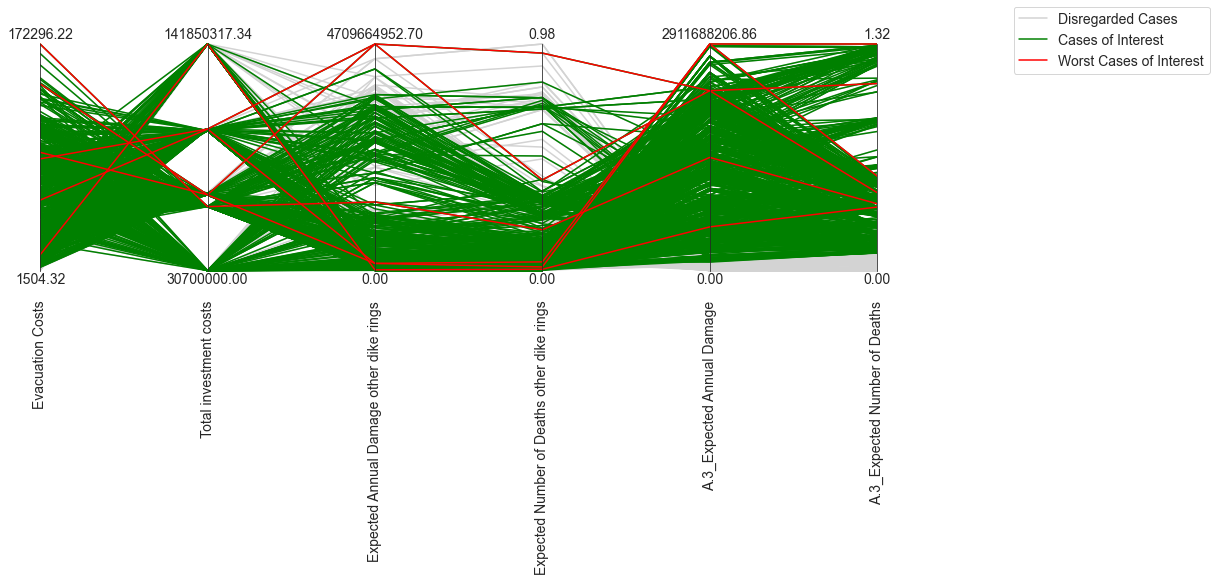

In [11]:
from ema_workbench.analysis import parcoords

# Plot parcoords
limits = parcoords.get_limits(all_data)
axes = parcoords.ParallelAxes(limits)
axes.plot(all_data, color='lightgrey', label="Disregarded Cases")
axes.plot(data, color='green', label="Cases of Interest")
axes.plot(worst_cases, color='red', label="Worst Cases of Interest")
axes.legend()
fig = axes.fig
fig.set_size_inches(15,5)
plt.savefig("Figures/parcoords_worst_cases.PNG")
plt.show()

In [12]:
# Create the new reference scenarios
scenarios = [Scenario(f"{index}", **row) for index, row in selected.iterrows()]

Assignment 7 on hypervolume:

Sometimes it is known a priori. For example in the lake problem, reliability is scalled between 0 and 1. In contrast, the bounds on max_P are not known up front. To help with this, we can introduce a constraint saying that max_P must be below a particulare threshold.

In [13]:
convergence_metrics = [EpsilonProgress()]
nfe= 50000
# 100 grid cells in objective space per outcome
# Based on max values encountered in open exploration
epsilons = [1e5/100, 3.55e9/100, 5.45e9/100, 3.53/100, 2e9/100, 2.5/100]

In [14]:
%%time


try:
    # Only run the experiments again if data hasn't been generated yet
    results_0 = pd.read_csv("results/results_0.csv", index_col=0)
    convergence_0 = pd.read_csv("results/convergence_0.csv", index_col=0)
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results_0, convergence_0 = evaluator.optimize(nfe=nfe, searchover='levers',
                                                      convergence=convergence_metrics,
                                                      reference=scenarios[0],
                                                      epsilons=epsilons)
          
    results_0.to_csv("results/results_0.csv")
    convergence_0.to_csv("results/convergence_0.csv")
    

try:
    # Only run the experiments again if data hasn't been generated yet
    results_1 = pd.read_csv("results/results_1.csv", index_col=0)
    convergence_1 = pd.read_csv("results/convergence_1.csv", index_col=0)
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results_1, convergence_1 = evaluator.optimize(nfe=nfe, searchover='levers', 
                                                      convergence=convergence_metrics,
                                                      reference=scenarios[1],
                                                      epsilons=epsilons)
          
    results_1.to_csv("results/results_1.csv")
    convergence_1.to_csv("results/convergence_1.csv")

try:
    # Only run the experiments again if data hasn't been generated yet
    results_2 = pd.read_csv("results/results_2.csv", index_col=0)
    convergence_2 = pd.read_csv("results/convergence_2.csv", index_col=0)
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results_2, convergence_2 = evaluator.optimize(nfe=nfe, searchover='levers', 
                                                      convergence=convergence_metrics,
                                                      reference=scenarios[2],
                                                      epsilons=epsilons)
          
    results_2.to_csv("results/results_2.csv")
    convergence_2.to_csv("results/convergence_2.csv")

try:
    # Only run the experiments again if data hasn't been generated yet
    results_3 = pd.read_csv("results/results_3.csv", index_col=0)
    convergence_3 = pd.read_csv("results/convergence_3.csv", index_col=0)
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results_3, convergence_3 = evaluator.optimize(nfe=nfe, searchover='levers',
                                                      convergence=convergence_metrics,
                                                      reference=scenarios[3],
                                                      epsilons=epsilons)
          
    results_3.to_csv("results/results_3.csv")
    convergence_3.to_csv("results/convergence_3.csv")

Wall time: 25 ms


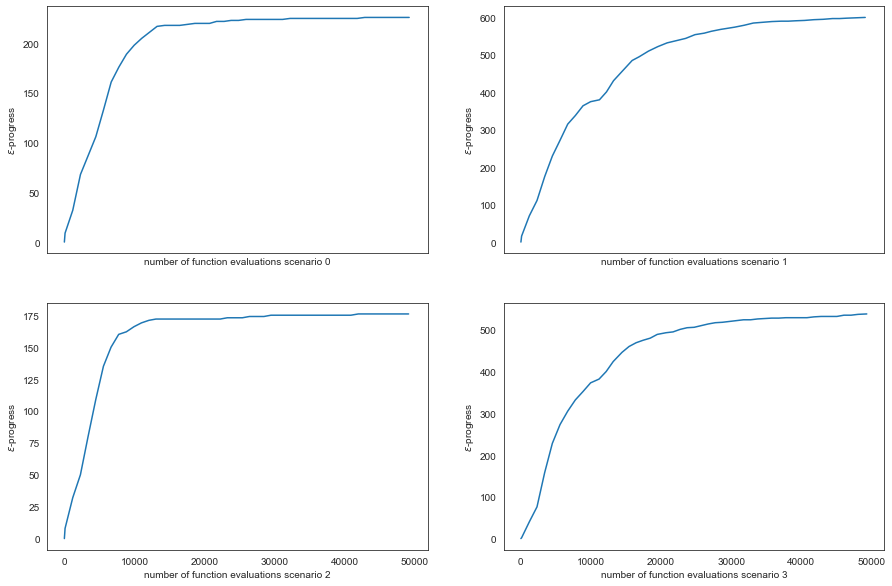

In [15]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(15,10))

axes[0,0].plot(convergence_0.nfe, convergence_0.epsilon_progress)
axes[0,0].set_ylabel('$\epsilon$-progress')
axes[0,0].set_xlabel('number of function evaluations scenario 0')

axes[0,1].plot(convergence_1.nfe, convergence_1.epsilon_progress)
axes[0,1].set_ylabel('$\epsilon$-progress')
axes[0,1].set_xlabel('number of function evaluations scenario 1')

axes[1,0].plot(convergence_2.nfe, convergence_2.epsilon_progress)
axes[1,0].set_ylabel('$\epsilon$-progress')
axes[1,0].set_xlabel('number of function evaluations scenario 2')

axes[1,1].plot(convergence_3.nfe, convergence_3.epsilon_progress)
axes[1,1].set_ylabel('$\epsilon$-progress')
axes[1,1].set_xlabel('number of function evaluations scenario 3')


plt.savefig("Figures/convergence_worst_scen.PNG")
plt.show()

In [16]:
index_0 = results_0.loc[:, [o.name for o in dike_model.outcomes]].idxmin().unique()
index_1 = results_1.loc[:, [o.name for o in dike_model.outcomes]].idxmin().unique()
index_2 = results_2.loc[:, [o.name for o in dike_model.outcomes]].idxmin().unique()
index_3 = results_3.loc[:, [o.name for o in dike_model.outcomes]].idxmin().unique()

C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)
C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:261: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


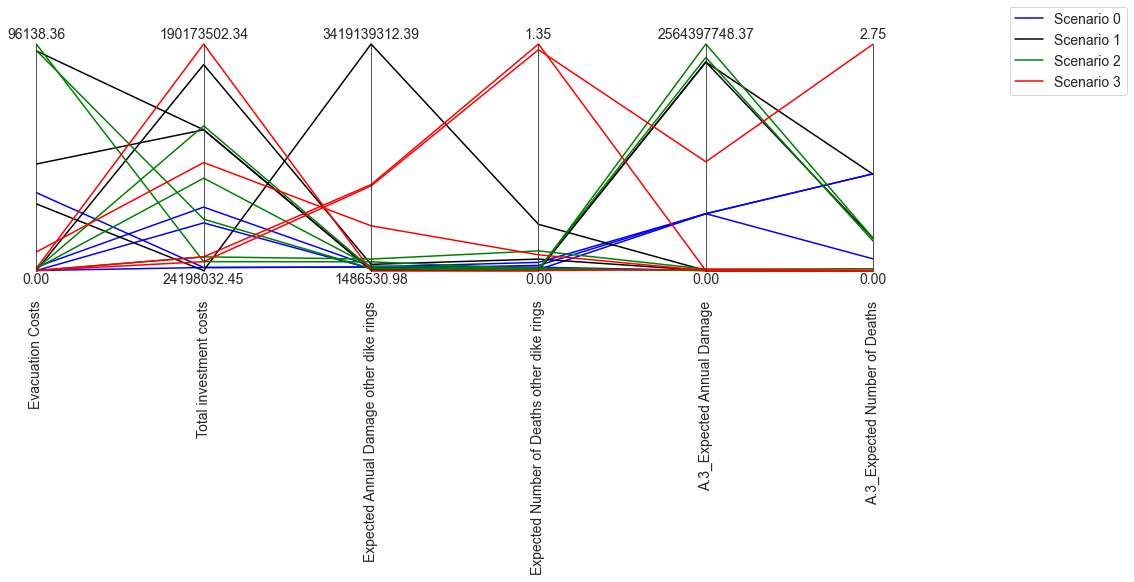

In [17]:
# Plot parcoords
best_outcomes_0 = results_0.loc[index_0, [o.name for o in dike_model.outcomes]]
best_outcomes_1 = results_1.loc[index_1, [o.name for o in dike_model.outcomes]]
best_outcomes_2 = results_2.loc[index_2, [o.name for o in dike_model.outcomes]]
best_outcomes_3 = results_3.loc[index_3, [o.name for o in dike_model.outcomes]]

best_list = [best_outcomes_0, best_outcomes_1, best_outcomes_2, best_outcomes_3]

best_outcomes = pd.concat(best_list)

limits = parcoords.get_limits(best_outcomes)

axes = parcoords.ParallelAxes(limits)

axes.plot(best_outcomes_0, color='blue', label="Scenario 0")
axes.plot(best_outcomes_1, color='black', label="Scenario 1")
axes.plot(best_outcomes_2, color='green', label="Scenario 2")
axes.plot(best_outcomes_3, color='red', label="Scenario 3")
axes.legend()

fig = axes.fig
fig.set_size_inches(15,5)
plt.savefig("Figures/parcoords_policies_worst_cases.PNG")
plt.show()

In [18]:
best_policies_0 = results_0.loc[index_0, [o.name for o in dike_model.levers]]
best_policies_1 = results_1.loc[index_1, [o.name for o in dike_model.levers]]
best_policies_2 = results_2.loc[index_2, [o.name for o in dike_model.levers]]
best_policies_3 = results_3.loc[index_3, [o.name for o in dike_model.levers]]

In [19]:
policies = pd.concat([best_policies_0, best_policies_1, best_policies_2, best_policies_3])
policies = policies.reset_index(drop=True)
policies = policies.drop_duplicates()
policies = policies.reset_index(drop=True)
policies.to_csv("results/measures_taken.csv")
policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
0,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,0,4,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,8,0,0,0,1,5,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,7,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


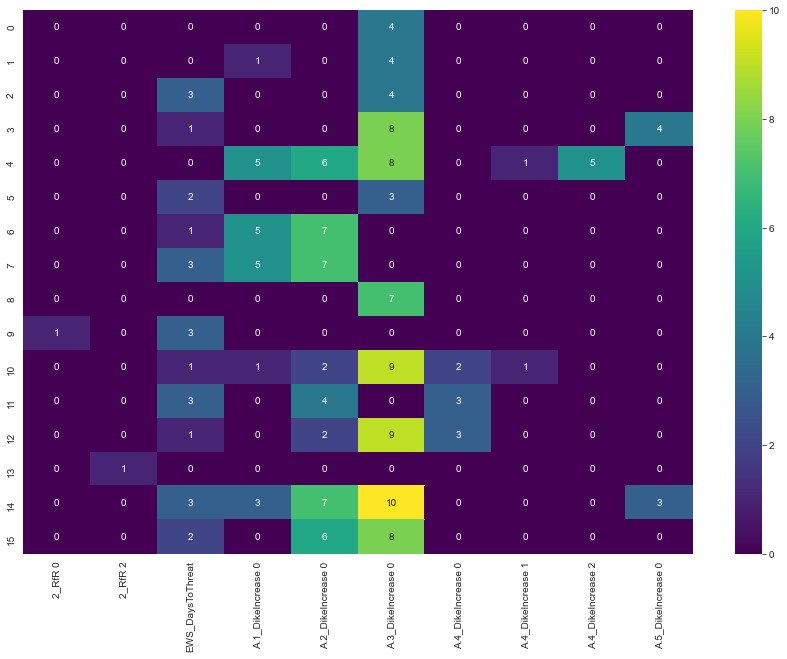

In [20]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(policies.loc[:, (policies != 0).any(axis=0)], 
            cmap='viridis', annot=True, ax=ax)
plt.savefig("Figures/measures_taken.PNG")
plt.show()

# Part 3

## Re-evaluate under deep uncertainty

Combine the pareto set of solutions found for each scenario. Next, turn each solution into a policy object. If you have a very large number of policies, you can choose to down sample your policies in some reasoned way (*e.g.*, picking min and max on each objective, slicing across the pareto front with a particular step size). As a rule of thumb, try to limit the set of policies to at most 50. 

Re-evaluate the combined set of solutions over 1000 scenarios sampled using LHS.

In [21]:
policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [22]:
len(policies_to_evaluate)

16

In [23]:
n_scenarios = 1000

In [24]:
%%time  
try:
    reeevaluation_results = load_results("results/re-evaluated.tar.gz")
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        reeevaluation_results = evaluator.perform_experiments(n_scenarios,
                                                              policies_to_evaluate)
        
    save_results(reeevaluation_results, "results/re-evaluated.tar.gz")

[MainProcess/INFO] results loaded succesfully from C:\Users\archipel-03\Documents\GitHub\MBDM\final assignment\results\re-evaluated.tar.gz


Wall time: 229 ms


In [25]:
experiments, outcomes = reeevaluation_results
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,121.0,245.014101,1.5,0.825246,163.280483,1.0,0.094753,194.910311,1.0,0.623158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,dikesnet
1,59.0,173.323960,1.5,0.374985,86.272793,1.5,0.311427,313.518290,10.0,0.988964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,dikesnet
2,44.0,137.426528,1.5,0.950771,94.037251,10.0,0.639192,69.201915,1.5,0.985588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,dikesnet
3,94.0,132.986571,1.5,0.336759,318.154458,1.0,0.854424,172.288180,1.5,0.991539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,dikesnet
4,123.0,266.622126,1.0,0.120309,65.682135,1.0,0.697973,237.960389,10.0,0.682972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,26.0,191.005135,10.0,0.223225,289.467137,1.0,0.212105,266.576896,10.0,0.895248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,995,15,dikesnet
15996,4.0,144.188046,1.0,0.396223,327.786345,1.5,0.248922,281.276852,10.0,0.180923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,996,15,dikesnet
15997,65.0,150.449987,10.0,0.268970,55.060407,1.0,0.560282,300.407661,1.0,0.560952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,997,15,dikesnet
15998,33.0,226.964909,1.5,0.675549,122.408777,1.0,0.529456,337.657408,1.0,0.987642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,998,15,dikesnet


## Domain Criterion

#### With investments costs in millions

In [26]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

def costs(data):
    return data[0]/1e6 # makes numbers nicer
    
SMALLER = 'SMALLER'

A_3_expected_number_of_deaths = functools.partial(robustness, SMALLER, 0.02) 
other_expected_number_of_deaths = functools.partial(robustness, SMALLER, 0.08)
evac_costs = functools.partial(robustness, SMALLER, 1e4) 
total_investment_costs = costs

C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


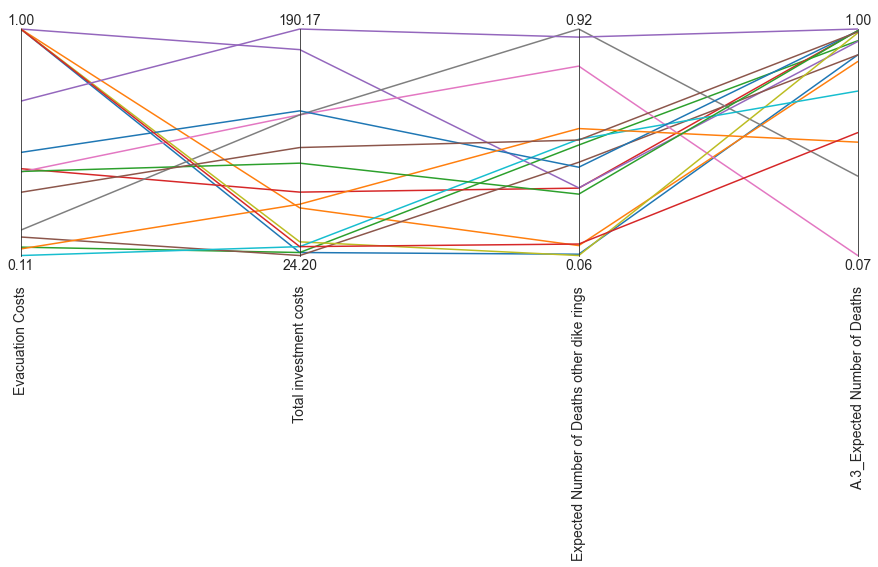

In [27]:
funcs = {'A.3_Expected Number of Deaths':A_3_expected_number_of_deaths,
         'Expected Number of Deaths other dike rings':other_expected_number_of_deaths,
         'Evacuation Costs': evac_costs,
         'Total investment costs': total_investment_costs}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
    for k, v in temp_outcomes.items():
        try:
            score = funcs[k](v)
        except KeyError:
            continue
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
# limits.loc[0, :] = 0
# limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
fig = paraxes.fig
fig.set_size_inches(15,5)
plt.show()

In [28]:
data

,Evacuation Costs,Total investment costs,Expected Number of Deaths other dike rings,A.3_Expected Number of Deaths
0,1.000,26.403380,0.062,0.893
1,1.000,59.098281,0.095,0.866
2,0.141,26.403380,0.480,0.951
3,0.450,70.662154,0.315,0.992
4,1.000,175.070449,0.316,0.948
5,0.181,24.198032,0.414,0.893
6,0.437,127.287956,0.782,0.072
7,0.208,127.287956,0.924,0.397
8,1.000,34.221562,0.057,0.983
9,0.108,30.700000,0.502,0.745


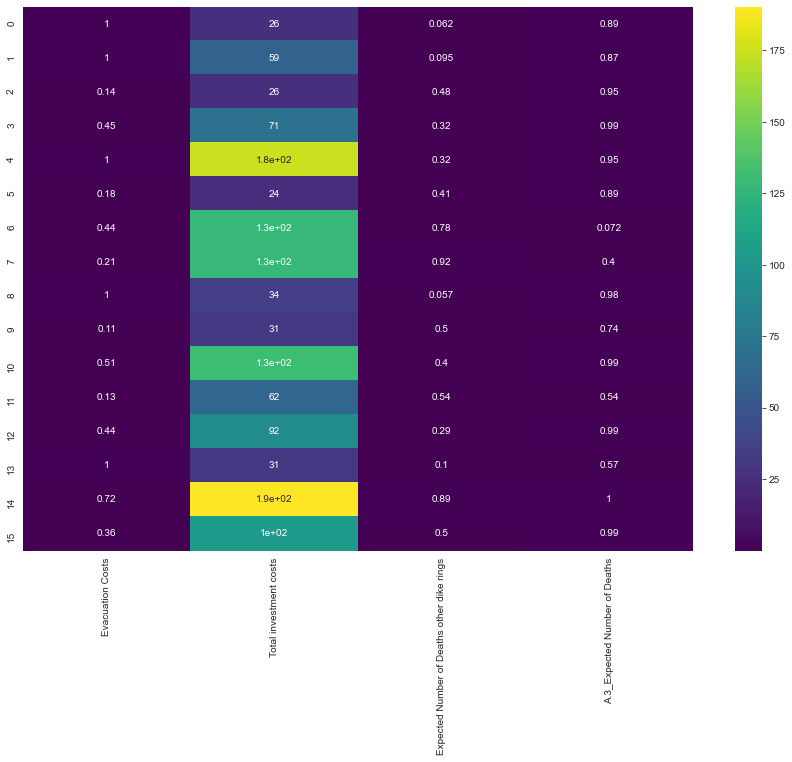

In [29]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data, cmap='viridis', annot=True, ax=ax)
plt.show()

Heatmap doesn't make sense when with costs still this high

#### With Investment costs normalized

In [30]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

def costs(data):
    return data[0] # makes numbers nicer
    
SMALLER = 'SMALLER'

A_3_expected_number_of_deaths = functools.partial(robustness, SMALLER, 0.02)
other_expected_number_of_deaths = functools.partial(robustness, SMALLER, 0.08)
evac_costs = functools.partial(robustness, SMALLER, 1e4)
total_investment_costs = costs


In [31]:
from sklearn import preprocessing

outcomes_norm = outcomes.copy()
outcomes_df = pd.DataFrame({k:v for k,v in outcomes.items()})
x = outcomes_df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_costs = pd.DataFrame(x_scaled, columns=outcomes_df.columns)
inverse_normalized = 1-normalized_costs["Total investment costs"].to_numpy()
outcomes_norm["Total investment costs"] = inverse_normalized

In [32]:
outcomes_df

,Evacuation Costs,Total investment costs,Expected Annual Damage other dike rings,Expected Number of Deaths other dike rings,A.3_Expected Annual Damage,A.3_Expected Number of Deaths
0,0.000000,2.640338e+07,9.376791e+08,0.790632,0.0,0.0
1,0.000000,2.640338e+07,1.944118e+09,1.221647,0.0,0.0
2,0.000000,2.640338e+07,1.082743e+08,0.063519,0.0,0.0
3,0.000000,2.640338e+07,2.262298e+09,1.401642,0.0,0.0
4,0.000000,2.640338e+07,2.756015e+09,1.920983,0.0,0.0
...,...,...,...,...,...,...
15995,25687.196135,1.033301e+08,3.059504e+09,0.282960,0.0,0.0
15996,13892.587483,1.033301e+08,1.137509e+09,0.121097,0.0,0.0
15997,30499.603697,1.033301e+08,2.654980e+09,0.296162,0.0,0.0
15998,75239.591591,1.033301e+08,1.370035e+09,0.171939,0.0,0.0


In [33]:
len(experiments['policy'])

16000

C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


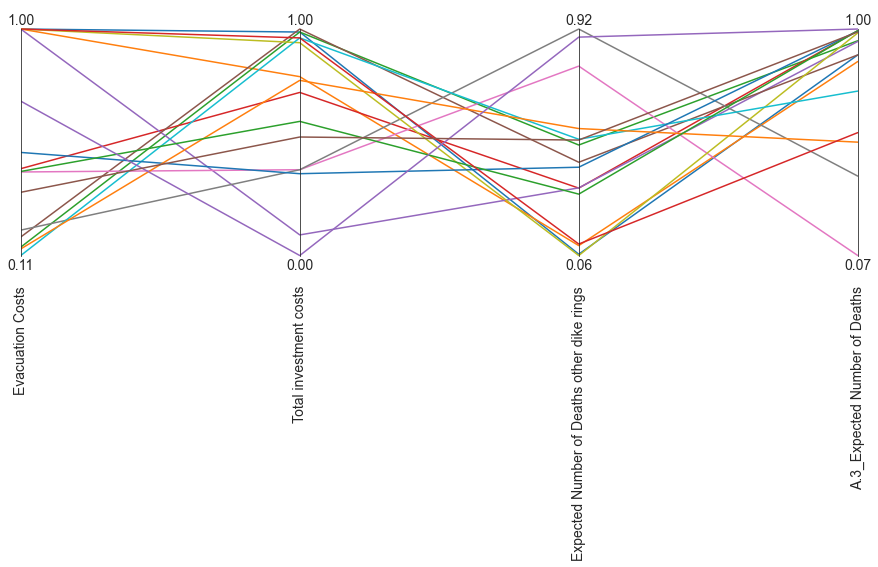

In [34]:
funcs = {'A.3_Expected Number of Deaths':A_3_expected_number_of_deaths,
         'Expected Number of Deaths other dike rings':other_expected_number_of_deaths,
         'Evacuation Costs': evac_costs,
         'Total investment costs': total_investment_costs}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes_norm.items()}
    
    for k, v in temp_outcomes.items():
        try:
            score = funcs[k](v)
        except KeyError:
            continue
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
# limits.loc[0, :] = 0
# limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
fig = paraxes.fig
fig.set_size_inches(15,5)
plt.show()

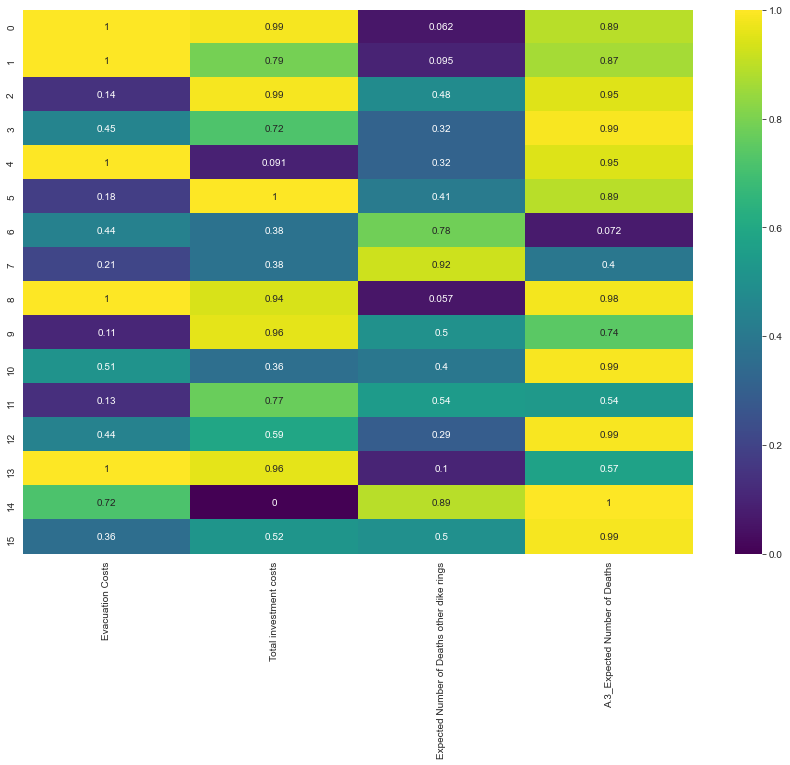

In [35]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data, cmap='viridis', annot=True, ax=ax)
plt.savefig("Figures/heatmap_domain_criterion.PNG")
plt.show()

## Max Regret

In [36]:
overall_regret = {}
max_regret = {}
for outcome in dike_model.outcomes:
    policy_column = experiments['policy']
    
    # create a DataFrame with all the relevent information
    # i.e., policy, scenario_id, and scores
    data = pd.DataFrame({outcome.name: outcomes[outcome.name], 
                         "policy":experiments['policy'],
                         "scenario":experiments['scenario']})
    
    # reorient the data by indexing with policy and scenario id
    data = data.pivot(index='scenario', columns='policy')
    
    # flatten the resulting hierarchical index resulting from 
    # pivoting, (might be a nicer solution possible)
    data.columns = data.columns.get_level_values(1)
    
    # we need to control the broadcasting. 
    # max returns a 1d vector across scenario id. By passing
    # np.newaxis we ensure that the shape is the same as the data
    # next we take the absolute value
    #
    # basically we take the difference of the maximum across 
    # the row and the actual values in the row
    #
    outcome_regret = (data.min(axis=1)[:, np.newaxis] - data).abs()
    
    overall_regret[outcome.name] = outcome_regret
    max_regret[outcome.name] = outcome_regret.max()

    max_regret = pd.DataFrame(max_regret)

<ipython-input-36-b0e6dfea2e58>:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  outcome_regret = (data.min(axis=1)[:, np.newaxis] - data).abs()


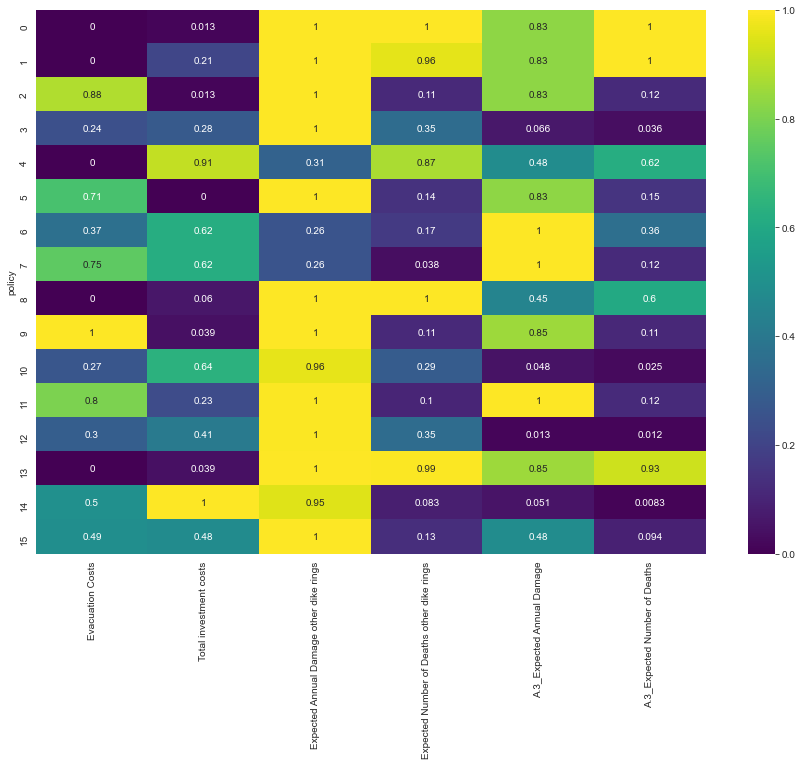

In [37]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(max_regret/max_regret.max(), cmap='viridis', annot=True, ax=ax)
plt.savefig("Figures/heatmap_max_regret.PNG")
plt.show()

C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)
C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:261: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


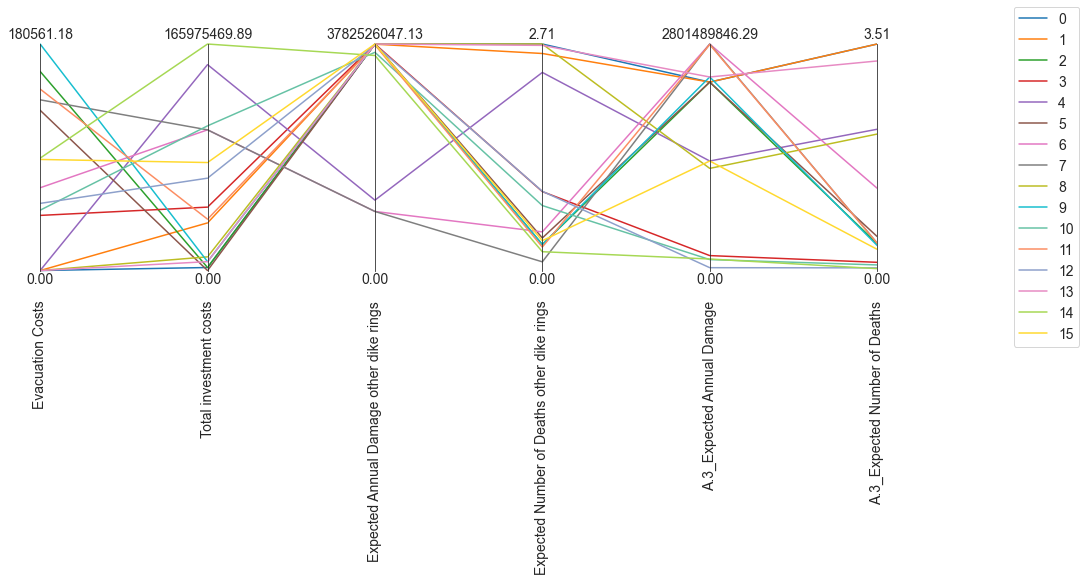

In [38]:
colors = sns.color_palette() + sns.color_palette("Set2")

data = max_regret

# makes it easier to identify the policy associated with each line
# in the parcoords plot
# data['policy'] = data.index.astype("float64")

limits = parcoords.get_limits(data)
limits.loc[0, [o.name for o in dike_model.outcomes]] = 0

paraxes = parcoords.ParallelAxes(limits)
for i, (index, row) in enumerate(data.iterrows()):
    paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])

paraxes.legend()
fig = paraxes.fig
fig.set_size_inches(15,5)    
plt.show()

From model answers assignment 8:

Note that we have been looking at the maximum regret. I also saved the distribution of regret over the set of scenarios. So let's visualize this and see what we can learn from it

In [39]:
from collections import defaultdict

policy_regret = defaultdict(dict)
for key, value in overall_regret.items():
    for policy in value:
        policy_regret[policy][key] = value[policy]

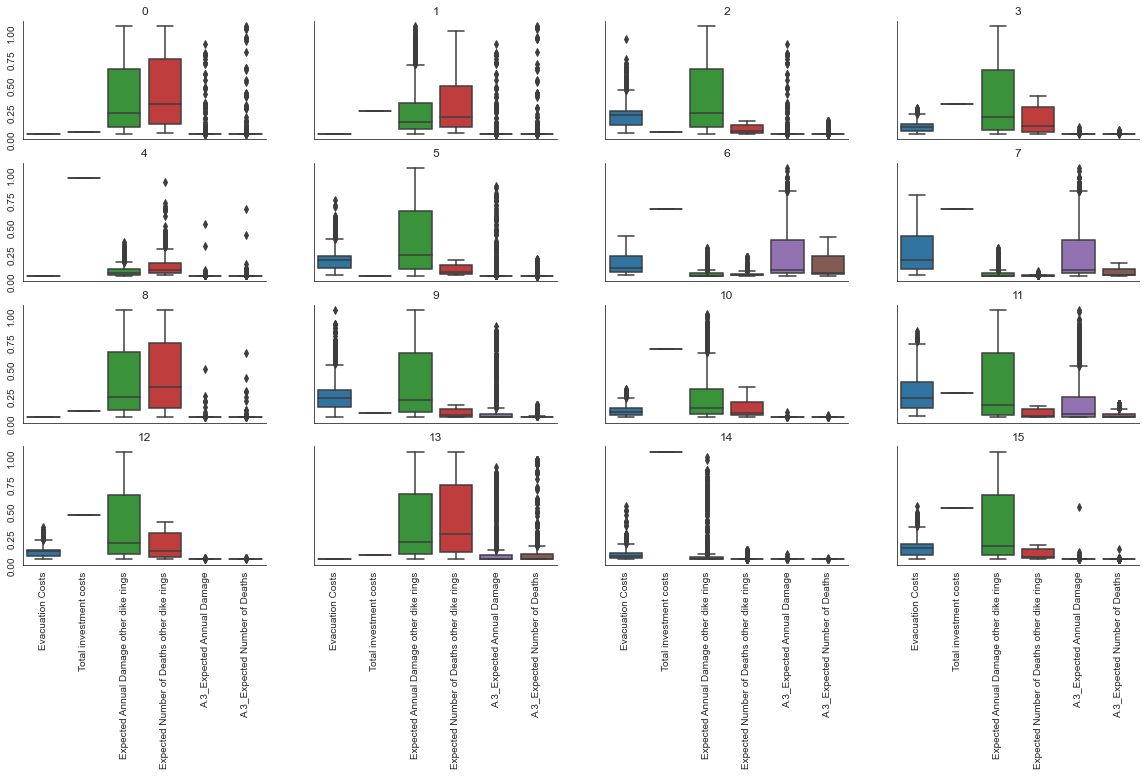

In [40]:
# this generates a 2 by 2 axes grid, with a shared X and Y axis
# accross all plots
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20,10), 
                         sharey=True, sharex=True)

# to ensure easy iteration over the axes grid, we turn it
# into a list.
axes_list = []
for i in range(4):
    for j in range(4):
        axes_list.append(axes[i,j])
axes_list

# zip allows us to zip together the list of axes and the list of 
# key value pairs return by items. If we iterate over this
# it returns a tuple of length 2. The first item is the ax
# the second items is the key value pair.
for ax, (policy, regret) in zip(axes_list, policy_regret.items()):
    data = pd.DataFrame(regret)

    # we need to scale the regret to ensure fair visual
    # comparison. We can do that by divding by the maximum regret
    data = data/max_regret.max(axis=0)
    sns.boxplot(data=data, ax=ax)
    
    ax.tick_params(labelrotation=90)
    #plt.xticks(rotation=90)
    
    # removes top and left hand black outline of axes
    sns.despine()
    
    # ensure we know which policy the figure is for
    ax.set_title(str(policy))
plt.savefig("Figures/boxplots_regret.PNG")    
plt.show()

## PRIM Scenario Discovery

Search for scenarios where policies have failed
A high deathrate for A.3

In [41]:
x = experiments.drop([o.name for o in dike_model.levers] + ["policy"], axis=1)
y = (outcomes['A.3_Expected Number of Deaths'] > 0.02)

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 16000 points remaining, containing 3180 cases of interest
[MainProcess/INFO] mean: 0.8806818181818182, mass: 0.011, coverage: 0.04874213836477988, density: 0.8806818181818182 restricted_dimensions: 6


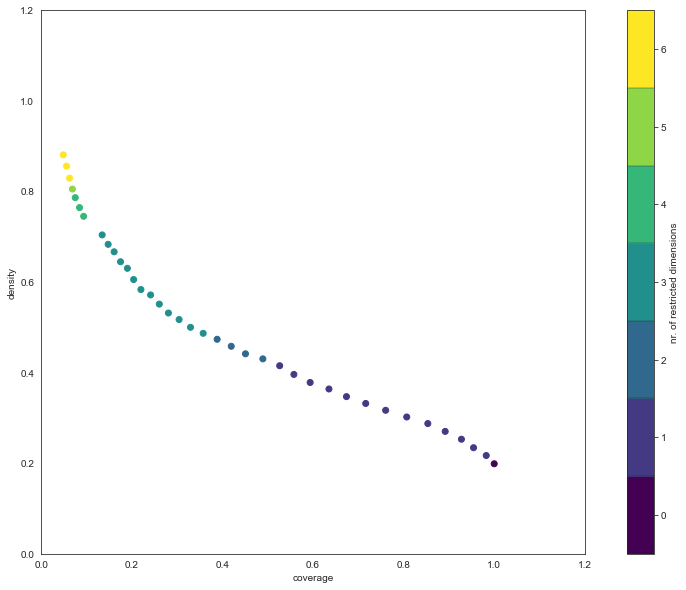

In [42]:
from ema_workbench.analysis.prim_util import PRIMObjectiveFunctions

prim_alg = prim.Prim(x, y,
                     threshold=0.6,
                     peel_alpha=0.1,
                     mass_min=0.01)
box = prim_alg.find_box()
box.show_tradeoff()
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [43]:
box.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.198750,0,1.000,0.198750,0
1,0.982390,0.216944,1,0.900,0.216944,1
2,0.954403,0.234182,2,0.810,0.234182,1
3,0.927673,0.252915,3,0.729,0.252915,1
4,0.891824,0.270198,4,0.656,0.270198,1
5,0.853459,0.287500,5,0.590,0.287500,1
6,0.806918,0.302024,6,0.531,0.302024,1
7,0.760377,0.316824,7,0.477,0.316824,1
8,0.716352,0.331876,8,0.429,0.331876,1
9,0.673899,0.346988,9,0.386,0.346988,1


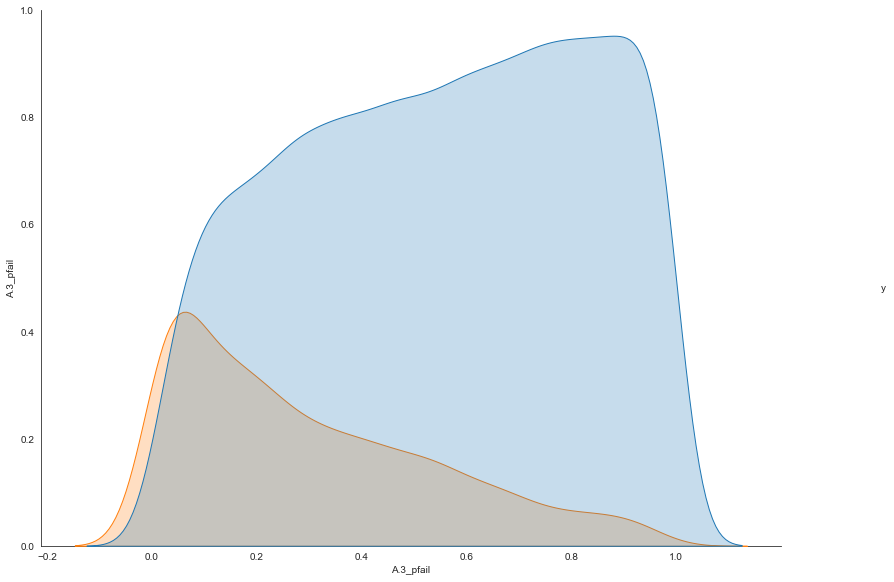

In [44]:
box.show_pairs_scatter(13)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

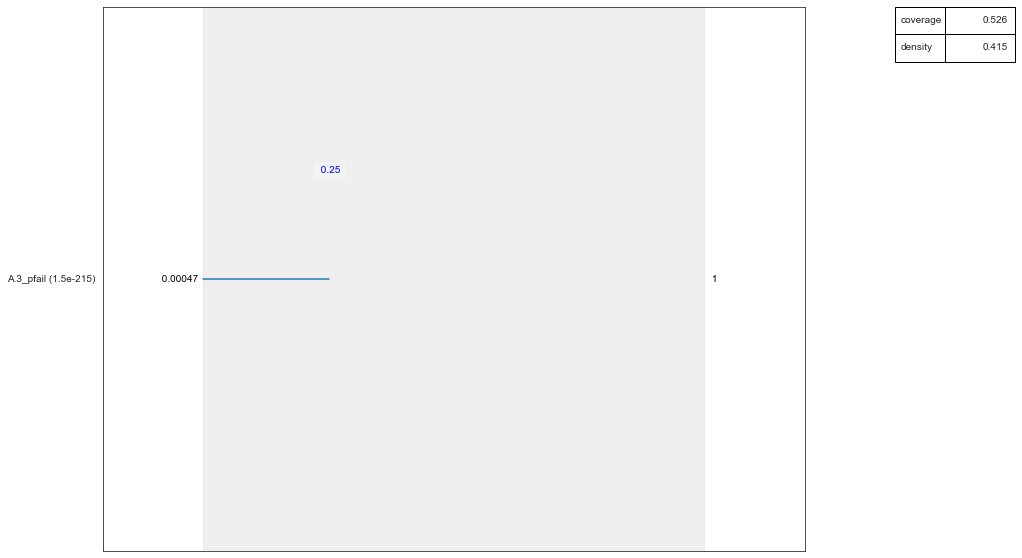

In [45]:
box.inspect(13, style="graph")

fig = plt.gcf()
fig.set_size_inches(15,10)
plt.savefig("Figures/prim_multi-scen.PNG")
plt.show()